In [37]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
g = nx.read_pajek('russians.net')

In [ ]:
# 次数中心性(degree centrality 記号：CD(i))
# 

In [3]:
g.number_of_nodes()

87250

In [4]:
deg = nx.degree(g)

In [7]:
min(deg.values())

1

In [8]:
max(deg.values())

4691

In [31]:
def sorted_map(map):
    return sorted(map.items(), key=lambda kv: (kv[1],kv[0]), reverse=True)

In [33]:
rank= sorted_map(deg)

In [34]:
rank[0:9]

[('borisakunin', 4691),
 ('doctor_liza', 3046),
 ('tareeva', 2970),
 ('cheger', 2887),
 ('karial', 2717),
 ('snorapp', 2707),
 ('masha_koroleva', 2683),
 ('elladkin', 2616),
 ('samoleg', 2597)]

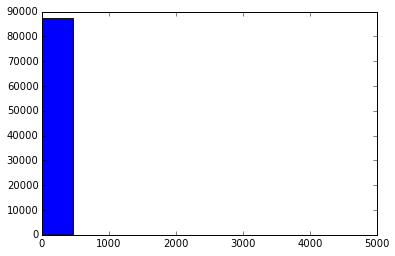

In [63]:
h = plt.hist(list(deg.values()),bins=10)

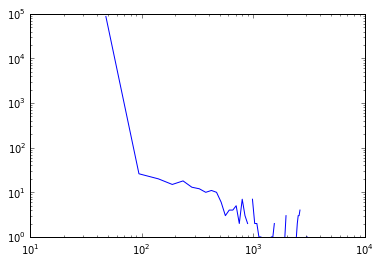

In [54]:
plt.loglog(h[1][1:], h[0])

In [68]:
def trim_degrees(g, degree=1):
    ng = g.copy()
    deg = nx.degree(ng)
    for n in ng.nodes():
        if deg[n] <= degree: ng.remove_node(n)
    return ng


In [70]:
core = trim_degrees(g)

In [71]:
core.number_of_nodes()

25905

In [72]:
core.number_of_edges()

81775

In [75]:
core10 = trim_degrees(g, degree=10)

In [77]:
len(core10)

619

In [78]:
core10.number_of_edges()

6935

In [79]:
pos = nx.spring_layout(core10)

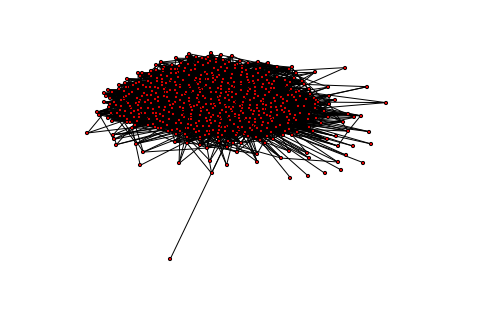

In [83]:
nx.draw(core10, node_size=10)

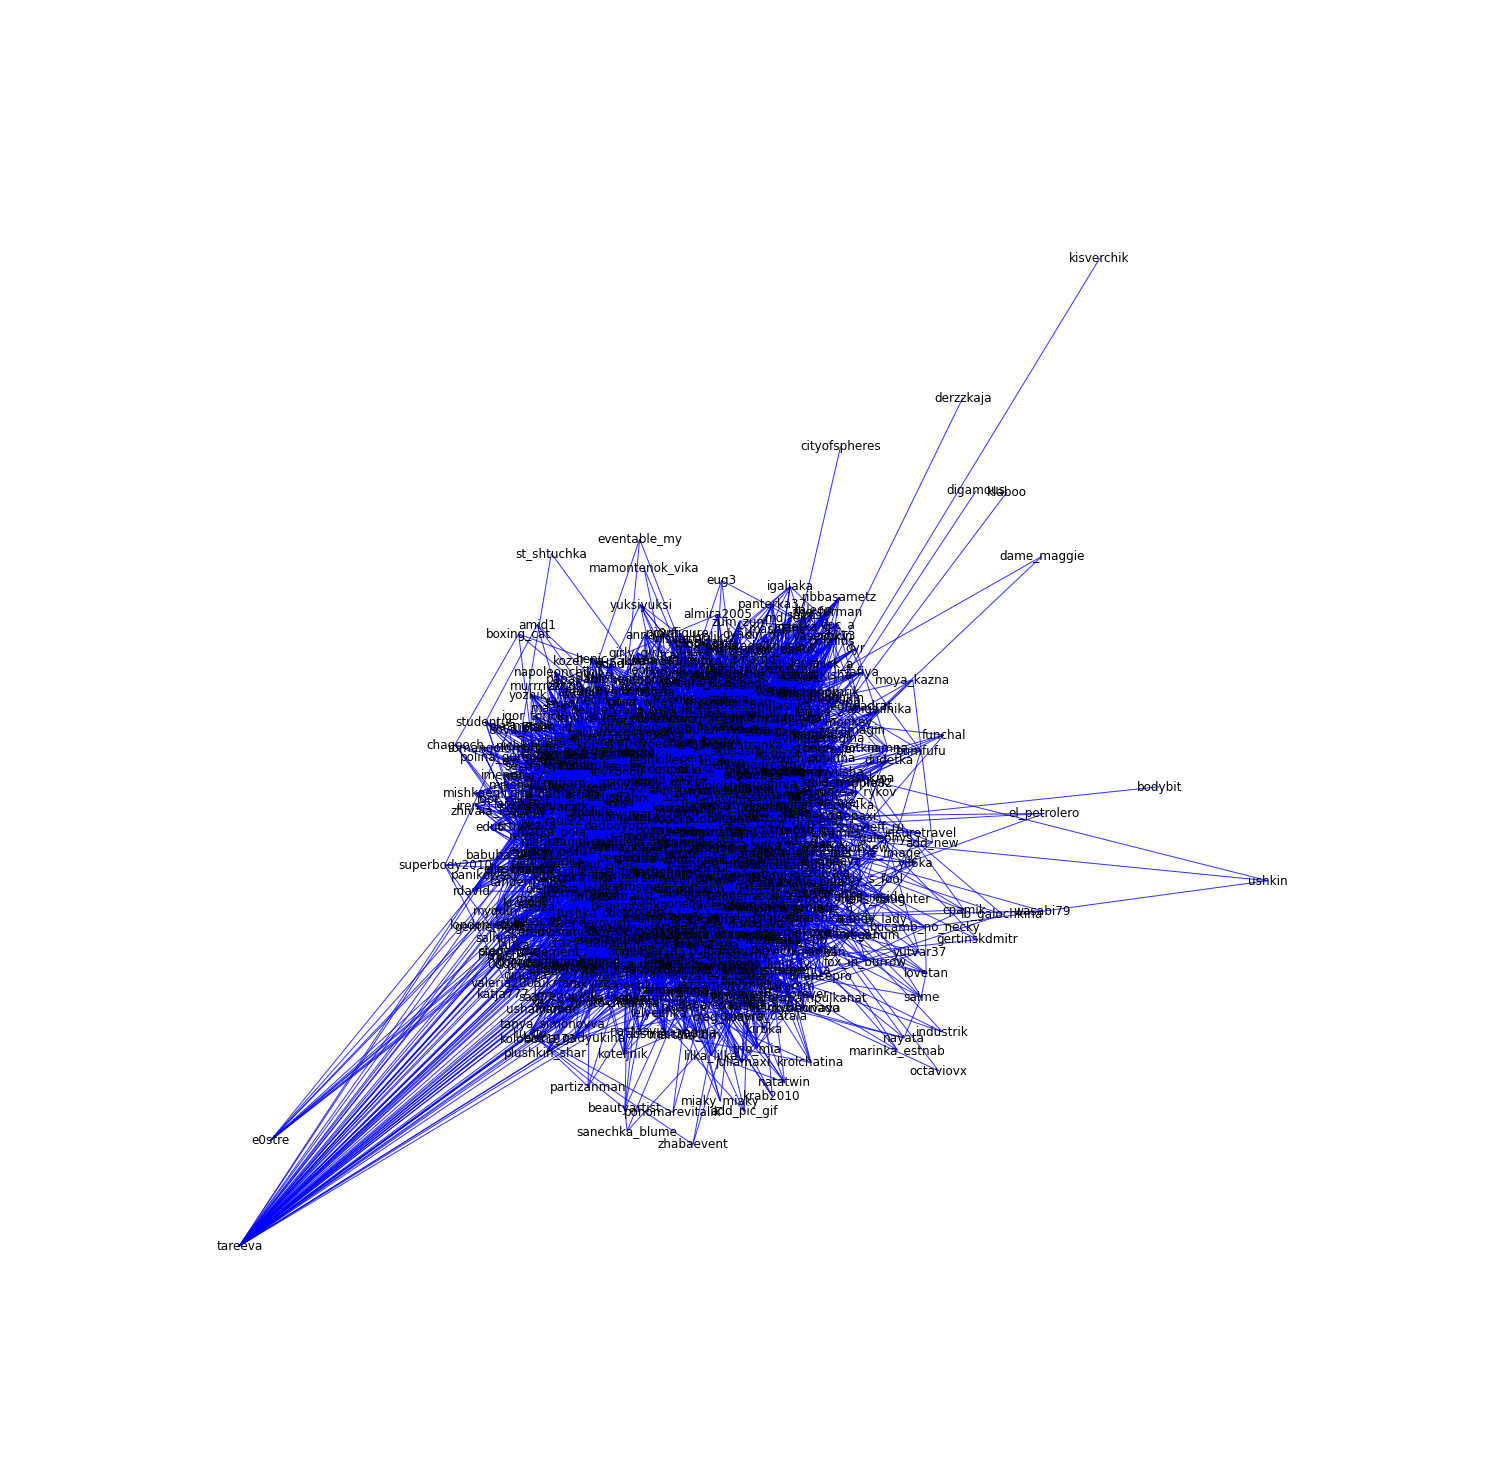

In [94]:
plt.figure(figsize=(20,20))
nx.draw(core10, pos=pos, node_size=0,edge_color='b',with_labels=1,alpha=.8,dpi=1000)

In [145]:
core20 = trim_degrees(g, degree=20)

In [146]:
len(core20)


262

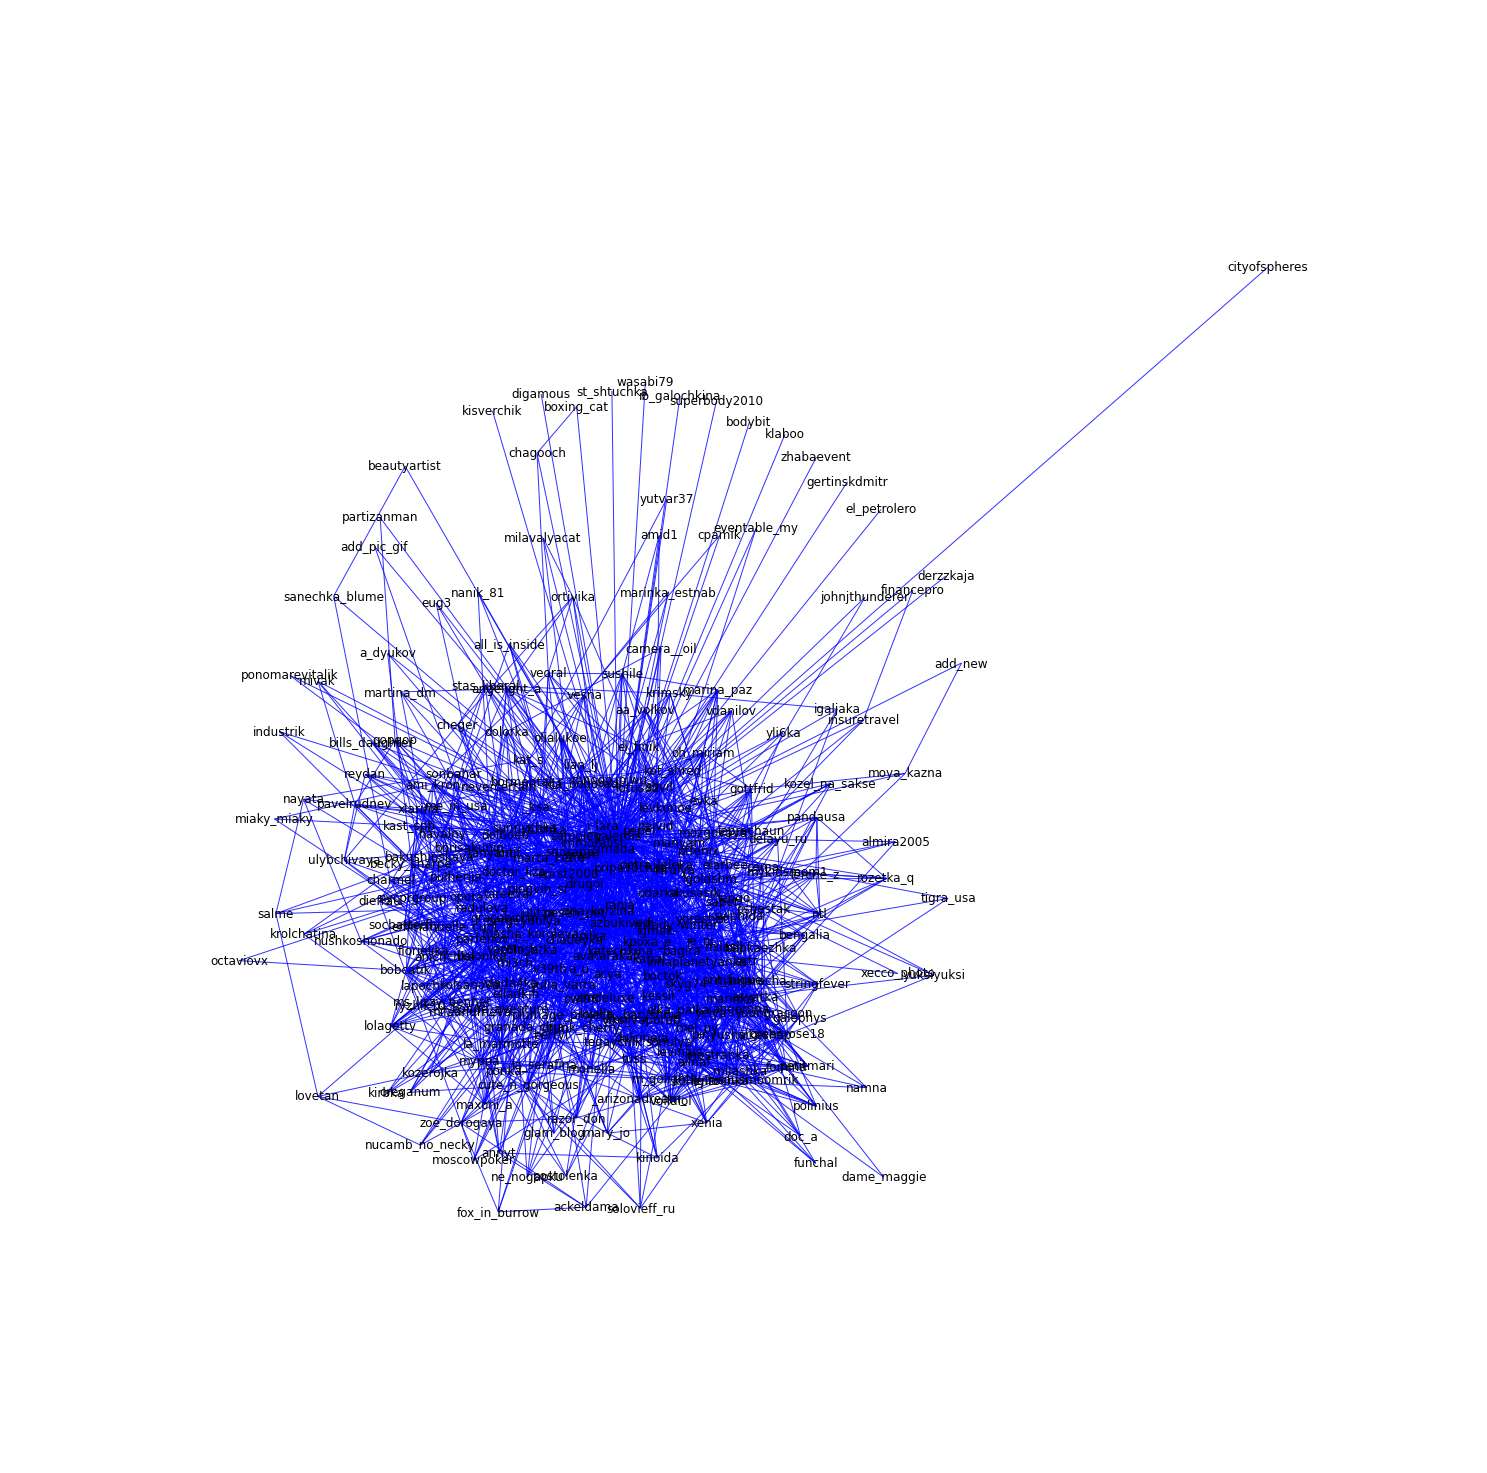

In [148]:
pos20 = nx.spring_layout(core20)
plt.figure(figsize=(20,20))
nx.draw(core20, pos=pos20, node_size=0,edge_color='b',with_labels=1,alpha=.8,dpi=1000)

In [106]:
core3 = trim_degrees(g, degree=3)
pos3= nx.spring_layout(core3)

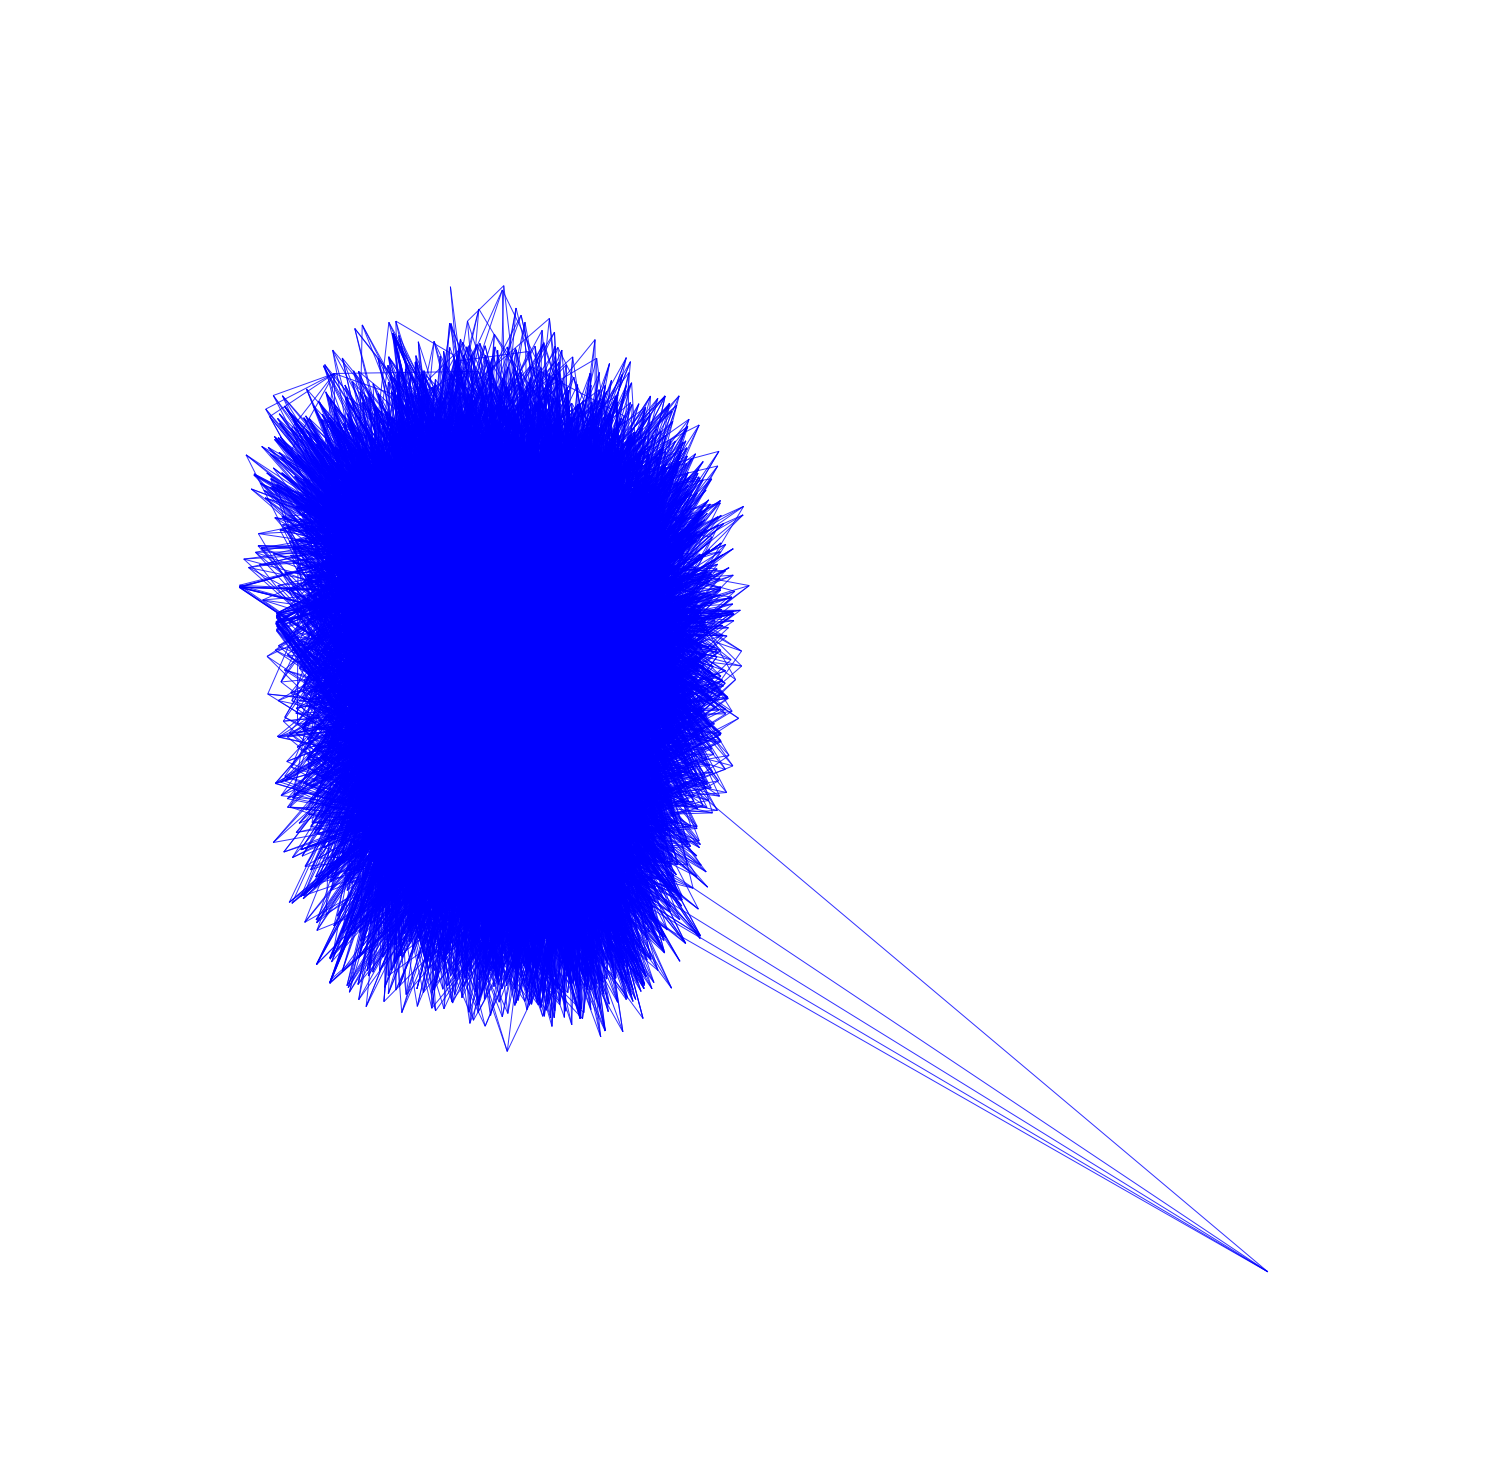

In [109]:
plt.figure(figsize=(20,20))
nx.draw(core3, pos=pos3, node_size=0,edge_color='b',with_labels=0,alpha=.8,dpi=1000)

In [117]:
c = nx.closeness_centrality(core10)

In [118]:
cs = sorted_map(c)

In [119]:
cs[:10]

[('azbukivedi', 0.6155378486055777),
 ('valerois', 0.6137040714995035),
 ('bagira', 0.5896946564885496),
 ('karial', 0.5738161559888579),
 ('kpoxa_e', 0.5722222222222222),
 ('yelya', 0.5369244135534318),
 ('kirulya', 0.5364583333333334),
 ('angerona', 0.535064935064935),
 ('borisakunin', 0.53184165232358),
 ('snorapp', 0.5300171526586621)]

In [120]:
c3 = nx.closeness_centrality(core3)

In [121]:
cs3 = sorted_map(c3)

In [135]:
cs3[:10]

[('valerois', 0.509230400383601),
 ('azbukivedi', 0.5012586532410321),
 ('kpoxa_e', 0.46984220616428257),
 ('drugoi', 0.4680132207124495),
 ('bagira', 0.4620404611703285),
 ('tushka', 0.45700351430825503),
 ('masha_koroleva', 0.4551753696692621),
 ('gracebirkin', 0.45439634885545177),
 ('000000000000000', 0.45368458526165895),
 ('tanyant', 0.4509235015214776)]

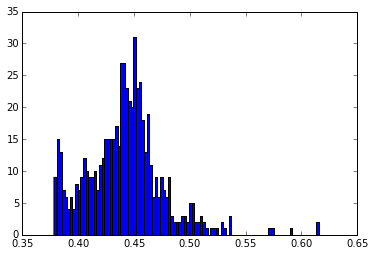

In [144]:
h = plt.hist([v for k, v in c.items()],bins=100)

In [151]:
print("""
媒介中心性(betweeness centrality)には、境界連結者を特定できるという別の大きな役割がある。境界連結者とは、その人物がいなければ互いにやり取りできない複数のコミュニティを結ぶ架け橋として機能する人物のことである”
""")


媒介中心性(betweeness centrality)には、境界連結者を特定できるという別の大きな役割がある。境界連結者とは、その人物がいなければ互いにやり取りできない複数のコミュニティを結ぶ架け橋として機能する人物のことである”



In [153]:
b = nx.betweenness_centrality(core10)

In [154]:
bs = sorted_map(b)

In [155]:
bs[:10]

[('valerois', 0.21148671833684934),
 ('azbukivedi', 0.09068546983753611),
 ('bagira', 0.06415743377135999),
 ('karial', 0.04943649873511702),
 ('kpoxa_e', 0.04044127058417227),
 ('snorapp', 0.026244420037490532),
 ('borisakunin', 0.023042685592280572),
 ('kirulya', 0.02260146049682854),
 ('eprst2000', 0.021420612080769154),
 ('doctor_liza', 0.020507259543668853)]

In [176]:
list(
set(map(lambda xs: xs[0], rank[:10])) &
set(map(lambda xs: xs[0], bs[:10])) &
set(map(lambda xs: xs[0], cs[:10]))
)


['karial', 'borisakunin', 'snorapp']

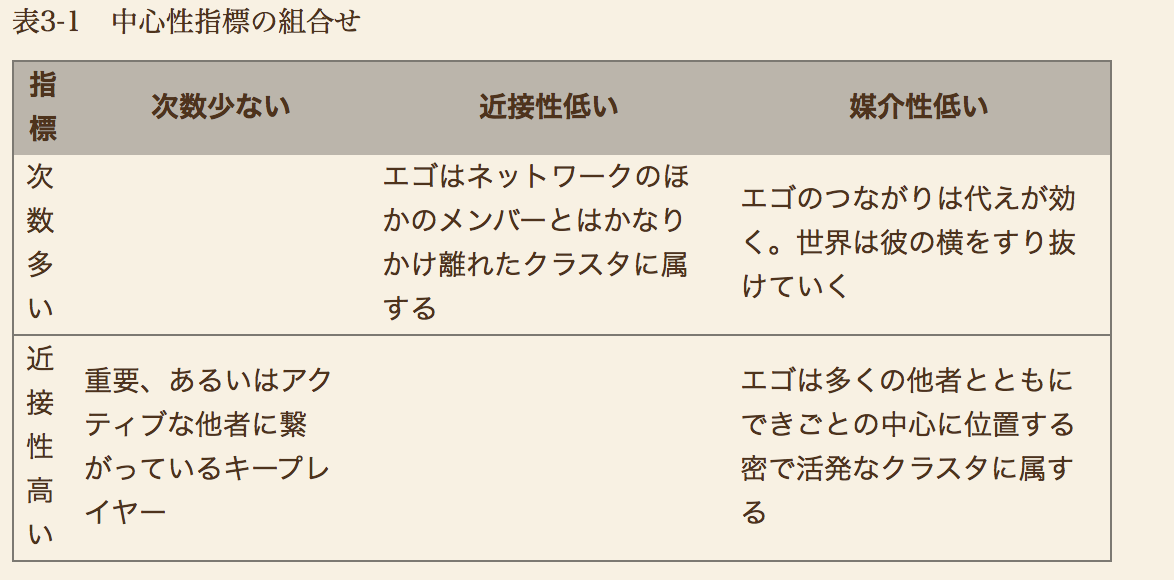

In [179]:
from IPython.display import Image
Image("./summary_centrality.png")


In [181]:
names = list(
set(map(lambda xs: xs[0], rank[:10])) |
set(map(lambda xs: xs[0], bs[:10])) |
set(map(lambda xs: xs[0], cs[:10]))
)

['doctor_liza',
 'angerona',
 'snorapp',
 'zina_korzina',
 'samoleg',
 'kpoxa_e',
 'azbukivedi',
 'valerois',
 'tareeva',
 'elladkin',
 'kirulya',
 'eprst2000',
 'cheger',
 'bagira',
 'karial',
 'borisakunin',
 'yelya',
 'masha_koroleva']

In [184]:
table = [ [name, deg[name], c[name], b[name]] for name in names]

In [194]:
import pandas as pd

In [208]:
pd.DataFrame(table,columns='name degree closeness-centrality betweeness-centrality'.split())

,name,degree,closeness-centrality,betweeness-centrality
0,doctor_liza,3046,0.481684,0.020507
1,angerona,752,0.535065,0.019238
2,snorapp,2707,0.530017,0.026244
3,zina_korzina,2596,0.492823,0.008964
4,samoleg,2597,0.475385,0.015664
5,kpoxa_e,946,0.572222,0.040441
6,azbukivedi,2541,0.615538,0.090685
7,valerois,232,0.613704,0.211487
8,tareeva,2970,0.475751,0.005885
9,elladkin,2616,0.464662,0.015728


In [235]:
print("""
固有ベクトル中心性は、次数中心性の再帰バージョンのようなものである
固有ベクトル中心性(eigenvector centrality)=
リンク先のノードの次数によって個々のリンクに重みを付けることを提案した（つまり、情報通は、情報源を持たない人々よりも価値がある）
Excerpt From: Maksim Tsvetovat. “オープンソースで学ぶ社会ネットワーク分析.” iBooks. 
""")


固有ベクトル中心性は、次数中心性の再帰バージョンのようなものである
固有ベクトル中心性(eigenvector centrality)=
リンク先のノードの次数によって個々のリンクに重みを付けることを提案した（つまり、情報通は、情報源を持たない人々よりも価値がある）
Excerpt From: Maksim Tsvetovat. “オープンソースで学ぶ社会ネットワーク分析.” iBooks. 



In [214]:
print("good resource http://www.geocities.jp/snatool/tutorial.html")

good resource http://www.geocities.jp/snatool/tutorial.html


In [219]:
sum(g.degree().values())/g.number_of_edges()

2.0

In [234]:
sorted_map(nx.eigenvector_centrality(nx.Graph(core10)))[:10]

[('azbukivedi', 0.23812269651735754),
 ('valerois', 0.2138478619064408),
 ('bagira', 0.21336315287200291),
 ('kpoxa_e', 0.18601369387772443),
 ('karial', 0.16918845326954912),
 ('yelya', 0.13473313329070677),
 ('angerona', 0.13457776922187903),
 ('boctok', 0.12118521455944983),
 ('mamaracha', 0.1104451760595214),
 ('snorapp', 0.10954908352397598)]

In [237]:
print("""
PageRankは外からのリンクによって中心性を判定している
PageRankは0から1までの間の値で、リンクをたどっている（つまり、ネットワークを横断している、ウェブをサーフィンしているなど）人が特定のページにたどり着いたり、特定の人に出会ったりする可能性を表している
""")


PageRankは外からのリンクによって中心性を判定している
PageRankは0から1までの間の値で、リンクをたどっている（つまり、ネットワークを横断している、ウェブをサーフィンしているなど）人が特定のページにたどり着いたり、特定の人に出会ったりする可能性を表している



In [240]:
pr = nx.pagerank(nx.Graph(g))

In [245]:
pr10 = nx.pagerank(nx.Graph(core10))

In [248]:
sorted_map(pr10)[:10]

[('valerois', 0.017610285345520855),
 ('azbukivedi', 0.014962257152541724),
 ('bagira', 0.013071988890355279),
 ('karial', 0.010925007536674834),
 ('kpoxa_e', 0.010181367846065515),
 ('snorapp', 0.008344777926142933),
 ('kirulya', 0.007863255017903944),
 ('angerona', 0.007814922691391498),
 ('borisakunin', 0.007574804468466216),
 ('doctor_liza', 0.007304380885144855)]

In [249]:
print("""
PageRankが媒介中心性のようなグラフ理論の抽象概念よりも「信頼の流れ」や「影響力の流れ」といったものを表していることである。PageRankの計算は性質上ローカル

Excerpt From: Maksim Tsvetovat. “オープンソースで学ぶ社会ネットワーク分析.” iBooks. 
""")


PageRankが媒介中心性のようなグラフ理論の抽象概念よりも「信頼の流れ」や「影響力の流れ」といったものを表していることである。PageRankの計算は性質上ローカル

Excerpt From: Maksim Tsvetovat. “オープンソースで学ぶ社会ネットワーク分析.” iBooks. 

